## Gathering Data ##

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
from requests import get
from io import BytesIO
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
#downloading data
data_url = 'https://storage.googleapis.com/kaggle-datasets/14506/21473/zomato-restaurants-data.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1569526991&Signature=JIglc2YwxR6yH%2BPZGE%2BWZtDKSnBurda3KXLp6%2FbS8XH%2FxYxPh3CzrlXTTW9wSfYTeJUsqibG%2FV%2Fq9CXps7CaOfEljw05fM7%2BEDae6qvq%2B5GeU%2FP0ydeXFxVtZb3SKhmdP%2BREWc0M0%2BMpttVP8bkHlxUJE5XjOGlyJebEkDALjbDPs2nrKr8B4kV6sWuxruXcRnX7z3Vg4h%2F8m6OAsFsYr%2F5eU9C7M7j6eETJiWFia601mM8jDEFbO4JjOjaMXtXXigZ0hVQ0cV%2BnJ0EgcxVi7rh9%2BUz%2FuAk5uVGswHWni2p%2FS6k1wmizd6gY7tI5LnX55WZlSy1iE%2FlysNbhRQthgw%3D%3D'
response = get(data_url)
print('Download complete')

# code below opens zip file; BytesIO returns a readable and writeable view of the contents;
unzipped_files = ZipFile(BytesIO(response.content))

Download complete


In [4]:
# unzipping the file to extract the csv
   
# Get a list of all archived file names from the zip
listOfFileNames = unzipped_files.namelist()
# Iterate over the file names
for fileName in listOfFileNames:
    # Check filename endswith csv
    if fileName.endswith('.csv'):
        # Extract a single file from zip
        unzipped_files.extract(fileName)
    elif fileName.endswith('.xlsx'):
        # Extract a single file from zip
        unzipped_files.extract(fileName)

In [5]:
# Loading the dataset
df = pd.read_csv('zomato.csv', encoding = 'latin-1', low_memory = False)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Assessing Dataset ##

In [6]:
df.shape

(9551, 21)

In [7]:
# Visually check 20 random records
df.sample(20)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
5794,18431181,Diya Chinese Food,1,New Delhi,"EA 156, Main Market, Inderpuri, Naraina, New D...",Naraina,"Naraina, New Delhi",77.146829,28.631206,Chinese,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
7209,18418252,Bikaner Sweets & Restaurant,1,New Delhi,"R-3, Rita Block, Main Market, Shakarpur, New D...",Shakarpur,"Shakarpur, New Delhi",77.282282,28.632808,"Desserts, North Indian",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
4608,8864,Peshawari Chicken Corner,1,New Delhi,"33-34 B, Prehlad Market, Ramjas Road, Karol Ba...",Karol Bagh,"Karol Bagh, New Delhi",77.190395,28.654488,North Indian,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.6,Yellow,Good,76
4883,9529,Baba Nagpal Corner,1,New Delhi,"7/25, Old Double Storey, Gupta Market, Lajpat ...",Lajpat Nagar 4,"Lajpat Nagar 4, New Delhi",77.240650,28.563789,"North Indian, Street Food",...,Indian Rupees(Rs.),No,No,No,No,1,4.1,Green,Very Good,577
2739,309390,Seasonings - The Spice Mysteries,1,New Delhi,"B-1/6, Ashok Vihar Phase 2, New Delhi",Ashok Vihar Phase 2,"Ashok Vihar Phase 2, New Delhi",77.179316,28.695053,"North Indian, Mughlai, Chinese, Italian",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.9,Yellow,Good,274
5746,18466387,Raju Fast Food,1,New Delhi,"Peer Baba Chowk, Shiv Ram Park, Opposite Chitr...",Nangloi,"Nangloi, New Delhi",77.060346,28.667421,"Street Food, Fast Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
6084,302221,Bikaner Sweet Corner,1,New Delhi,"Near Manglapuri Terminal, Palam, New Delhi",Palam,"Palam, New Delhi",77.088933,28.590133,"Mithai, Street Food",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
6160,18244429,Raj Shri,1,New Delhi,"Mandawali Fazalpur, Pandav Nagar, New Delhi",Pandav Nagar,"Pandav Nagar, New Delhi",77.283379,28.618066,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
3967,18472605,Hot Kathi Roll,1,New Delhi,"Gautam Nagar, Hauz Khas, New Delhi",Hauz Khas,"Hauz Khas, New Delhi",77.209753,28.560155,Fast Food,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
4451,1876,Khidmat,1,New Delhi,"E-9, Main Road, Near Deshbandhu College, Kalka...",Kalkaji,"Kalkaji, New Delhi",77.254480,28.541795,"North Indian, Mughlai, Chinese",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.6,Yellow,Good,372


In [8]:
# View info of the dataframe
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [9]:
# Check if duplicates exist
df.duplicated().sum()

0

In [10]:
# View descriptive statistics of the dataframe
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
# Checking for unique values
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

#### Quality issues ####


* Rename 'Average Cost for two' column
* 'City', 'Rating color' column should be catagorical
* Drop 'Is delivering now' & 'Switch to order menu' columns
* Address the 'Cuisines' column issue

## Cleaning Data ##

In [12]:
# making a copy of the dataset
df_clean = df.copy()

#### Define: ####

The column 'Average Cost for two' uses reserved keywords and needs to be renamed.

#### Code: ####

In [13]:
df_clean.rename(columns = {'Average Cost for two':'Average_Cost_for_two'}, inplace = True)

#### Test: ####

In [14]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average_Cost_for_two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

#### Define: ####

The 'City' and 'Rating color' columns are string datatype but should be catagorical.

#### Code: ####

In [15]:
df_clean.City = df_clean.City.astype('category')
df_clean['Rating color'] = df_clean['Rating color'].astype('category')

#### Test: ####

In [16]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null category
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average_Cost_for_two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null category
Rating text             9551 non-nu

#### Define: ####

Drop 'Is delivering now' & 'Switch to order menu' columns

#### Code: ####

In [17]:
df_clean = df_clean.drop(['Is delivering now','Switch to order menu'],axis = 1)

#### Test ####

In [18]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null category
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average_Cost_for_two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null category
Rating text             9551 non-null object
Votes                   9551 non-null int64
dtypes: category(2), float64(3), int

#### Define: ####

Device a function 'sepCuisines' where Spliting the contents of "Cuisines" column and stacking them up one after the other and inserting into a series. Later joining each contents of series with the 'clean_df' and storing the contents in "Cuisines_right" column. 

This technique of segregating the data leads to duplication and hence we will be storing this in a seperate dataframe called 'all_Cuisines' and droping the original 'Cuisines' column from the dataframe.

#### Code: ####

In [19]:
def sepCuisines(df_clean):
    return df_clean.join(df_clean.Cuisines.str.strip(',').str.split(',',expand=True).stack().reset_index(level=1,drop=True).rename('Cuisines'), rsuffix='_right').reset_index(drop=True)
all_Cuisines = sepCuisines(df_clean)

In [20]:
all_Cuisines = all_Cuisines.drop('Cuisines',axis = 1)

#### Test: ####

In [21]:
all_Cuisines.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Average_Cost_for_two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines_right
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,314,French
1,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,314,Japanese
2,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,1100,Botswana Pula(P),Yes,No,3,4.8,Dark Green,Excellent,314,Desserts
3,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,1200,Botswana Pula(P),Yes,No,3,4.5,Dark Green,Excellent,591,Japanese
4,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,4000,Botswana Pula(P),Yes,No,4,4.4,Green,Very Good,270,Seafood


In [22]:
# writing clean datasets to csv#

df_clean.to_csv('clean_data.csv',index=False)
all_Cuisines.to_csv('Cuisines_separated.csv',index=False)

## Analysis: ##

#### Q. Which countries does zomato operate in? ####

In [23]:
df_clean['Country Code'].nunique()

15

So zomato operates in 15 countries across the globe.

In [24]:
df_clean['Country Code'].value_counts()

1      8652
216     434
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

Here we can see that Country Code 1 and Country Code 216 has the most number of restaurant registered in zomato. Lets check out those countries from the 'Country Code' sheet.

In [25]:
country = pd.read_excel('Country-Code.xlsx')
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [26]:
indian_restaurants = df_clean[df_clean['Country Code'] == 1]
indian_restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,3,4.2,Green,Very Good,177


#### What type of cuisines available in Indian restaurants? ####

In [27]:
indian_restaurants['Cuisines'].nunique()


1392

In [28]:
indian_restaurants['Cuisines'].unique()

array(['North Indian, Mughlai', 'North Indian', 'Rajasthani', ...,
       'Continental, Seafood, Chinese, North Indian, Biryani',
       'Burger, Pizza, Biryani',
       'American, North Indian, Thai, Continental'], dtype=object)

#### Total no. of restaurants in India ####

In [29]:
indian_restaurants['Restaurant ID'].nunique()

8652

In [30]:
indian_restaurants.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

As we go along with the analysis we will try to find out what factors influences the ratings of the restaurants. The ability to book a table for example might influence how a potential customer leaves a rating. Another important factor would be the authenticity of the cuisine being served. As a general rule of thumb one might say that a multi-cuisine restaurant might be less authentic than one that serves only one type of cuisine.

In [31]:
sns.set(font_scale=1.2, rc={'figure.figsize':(8,5)})
warnings.simplefilter(action='ignore', category=FutureWarning)

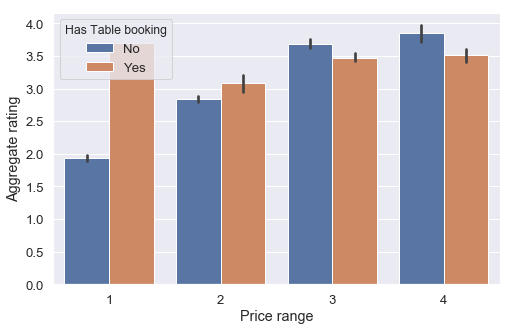

In [32]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Table booking', data=indian_restaurants)

It seems that for restaurants that are more affordable (has a lower price range) have higher ratings if they provide table booking services.For pricier restaurants table booking option does not seem to affect the ratings much.

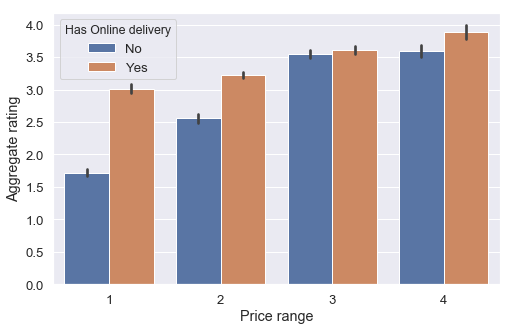

In [33]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Online delivery', data=indian_restaurants)

Again for restaurants that are in the lower price range (1 and 2) seems to have better average rating if they provide online delivery services. This is not so signficant for the restaurants falling in the pricier category.

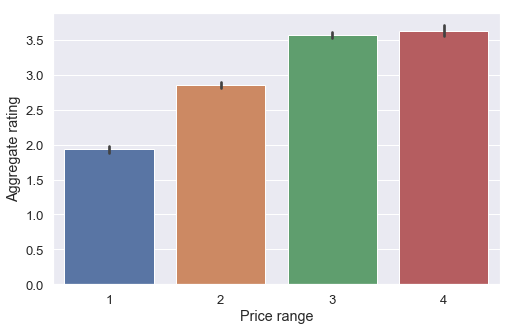

In [34]:
sns.barplot(x="Price range", y='Aggregate rating', data=indian_restaurants)

The 'Switch to order menu' service is not provided by any of the restaurants that have been reviewed in Zomato. But this interestingly shows the general trend of ratings provided by the users. The lower price restaurants in general have worser ratings compared to the pricier ones. There is essentially little difference in the ratings of price categories 1 and 2.